# Data Analysis Project

This project is an analysis of the relationship between occupations, workers, and incomes. It focuses on the number of female versus male workers and the pay gap across different industries. I used a data set on Kaggle titled, "U.S. Incomes by Occupation and Gender." I chose this data set to analyze the gender pay gap and see which industries have a worse gap. We must understand the disparities in wages by gender along with the gender gap among workers to promote gender equality in the workplace. This project explores the number of workers and weekly median pay by gender and occupation category. Then, it finds the highest occupational paying category and focuses on the weekly pay and number of workers for that. It focuses on the gender pay gap within that category as well.

https://www.kaggle.com/datasets/jonavery/incomes-by-career-and-gender

__Research Questions__

- What occupation category has the largest gap between male and female workers and their pay?
- What occupation categories have the highest and lowest weekly pay?
- Inside those category, what is the weekly pay compared to number of workers for each occupation?
- Which of those categories has a larger gender gap?

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing dataset I will be using and changing the column names
occupation_data = pd.read_csv("inc_occ_gender.csv")
occupation_data.columns = ["OCCUPATION", "WORKERS_ALL", "PAYWEEKLY_ALL", "WORKERS_M", "PAYWEEKLY_M", "WORKERS_F", "PAYWEEKLY_F"]

In [3]:
#creating a copy of the data set for my first research question
category_data = occupation_data.copy()
#narrowing the data set down to just include the occupation category (citation 1)
category_data = category_data[category_data['OCCUPATION'].str.isupper()]
#drop the "ALL OCCUPATIONS" row
category_data.drop(labels = [0], axis = 0, inplace = True)
category_data = category_data.sort_values("OCCUPATION", ascending = False)

In [4]:
#switching the weekly pays to integers because they werent in the original dataset
category_data.dtypes
category_data['PAYWEEKLY_ALL'] = pd.to_numeric(category_data['PAYWEEKLY_ALL'])
category_data['PAYWEEKLY_M'] = pd.to_numeric(category_data['PAYWEEKLY_M'])
category_data['PAYWEEKLY_F'] = pd.to_numeric(category_data['PAYWEEKLY_F'])

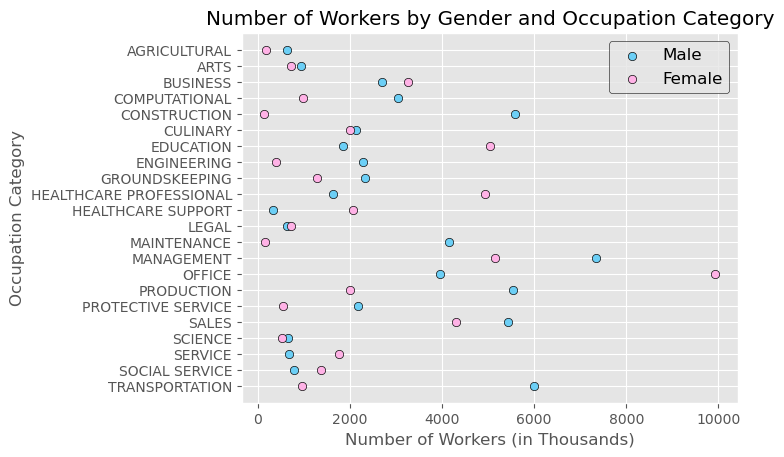

In [5]:
#creating my first graph for my first research question: the gap between male and female workers
plt.style.use("ggplot") #setting the plot style to ggplot
#extracting the relevant data for male and female workers and the occupation
workers_M = category_data["WORKERS_M"]
workers_F = category_data["WORKERS_F"]
occupation = category_data["OCCUPATION"]
#defining the color black for the legend border
color = "#0A0A0A"
plt.scatter(workers_M, occupation, c = "#6CCFF6", label = 'Male', edgecolor = color) #scatter plot for male workers
plt.scatter(workers_F, occupation, c = "#FFB2E6", label = 'Female', edgecolor = color) #scatter plot for female workers
plt.xlabel('Number of Workers (in Thousands)')
plt.ylabel('Occupation Category')
plt.title("Number of Workers by Gender and Occupation Category")
#adding a legend for colors
plt.legend(fontsize = 'large', edgecolor = color)

plt.show()

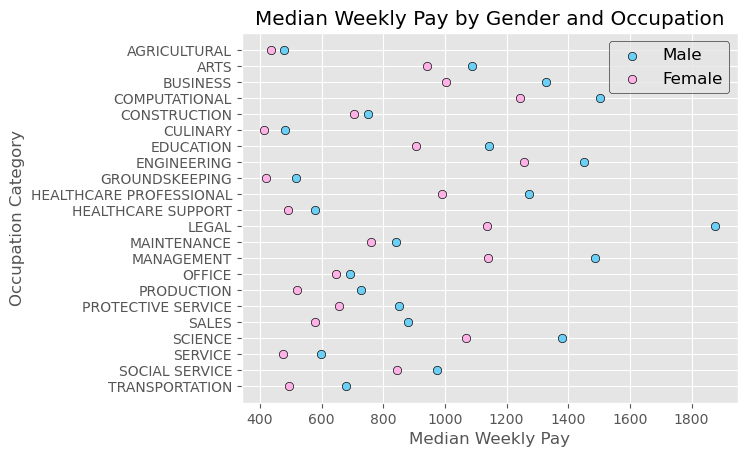

In [6]:
#creating my second graph for my first research question: the pay gap between male and female workers
plt.style.use("ggplot")
weekly_M = category_data["PAYWEEKLY_M"]
weekly_F = category_data["PAYWEEKLY_F"]
plt.scatter(weekly_M, occupation, c = "#6CCFF6", label = 'Male', edgecolor = color)
plt.scatter(weekly_F, occupation, c = "#FFB2E6", label = 'Female', edgecolor = color)
#add x-axis labels, y-axis label, and a title
plt.xlabel('Median Weekly Pay')
plt.ylabel('Occupation Category') 
plt.title("Median Weekly Pay by Gender and Occupation")
plt.legend(fontsize = 'large', edgecolor = color)

plt.show()

In [7]:
#sorting the dataset for my next research question: what occupation category has the highest weekly pay
weeklypaybyoccupation = category_data[["OCCUPATION", "PAYWEEKLY_ALL"]]
weeklypaybyoccupation = weeklypaybyoccupation.sort_values("PAYWEEKLY_ALL", ascending = False)
#sorting only the highest 10 values
top_weeklypaybyoccupation = weeklypaybyoccupation.head(10)
#part two of the research question, sorting only the lowest 10 values
bottom_weeklypaybyoccupation = weeklypaybyoccupation.tail(10)

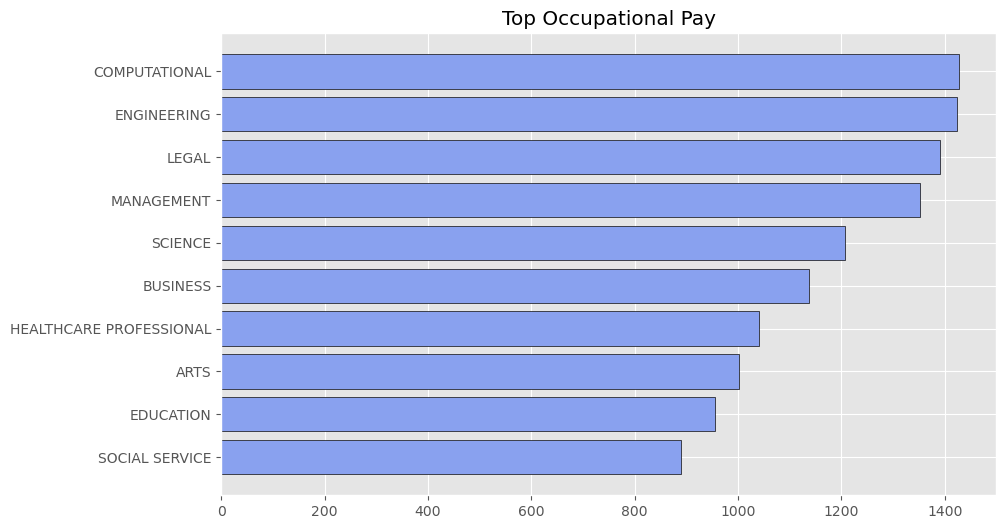

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
toppay = top_weeklypaybyoccupation["PAYWEEKLY_ALL"]
topoccupation = top_weeklypaybyoccupation["OCCUPATION"]
#creating a sideways bar graph so you can see the occupation names
ax.barh(topoccupation, toppay, .8, color = "#89A1EF", edgecolor = color)
ax.invert_yaxis()
ax.set_title("Top Occupational Pay")

plt.show()

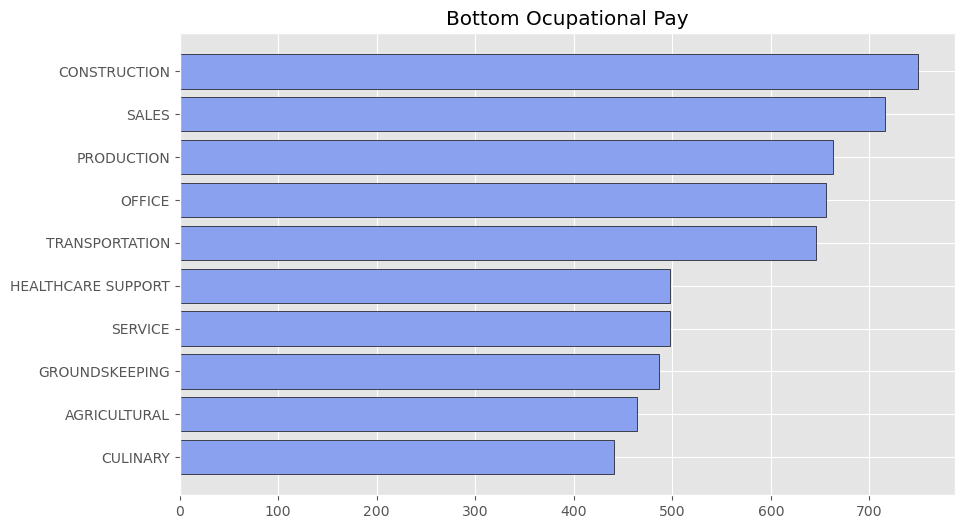

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
bottompay = bottom_weeklypaybyoccupation["PAYWEEKLY_ALL"]
bottomoccupation = bottom_weeklypaybyoccupation["OCCUPATION"]
ax.barh(bottomoccupation, bottompay, .8, color = "#89A1EF", edgecolor = color)
ax.invert_yaxis()
ax.set_title("Bottom Ocupational Pay")

plt.show()

In [10]:
#narrowing down the computational and culinary occupations as they are the highest and lowest pay respectively
computational = occupation_data.copy()
computational = computational.loc[63:77]
#dropping na values, drop.na doesnt work due to the data not being an integeer
computational.drop(labels = [73, 74, 77], axis = 0, inplace = True)

culinary = occupation_data.copy()
culinary = culinary.loc[237:248]

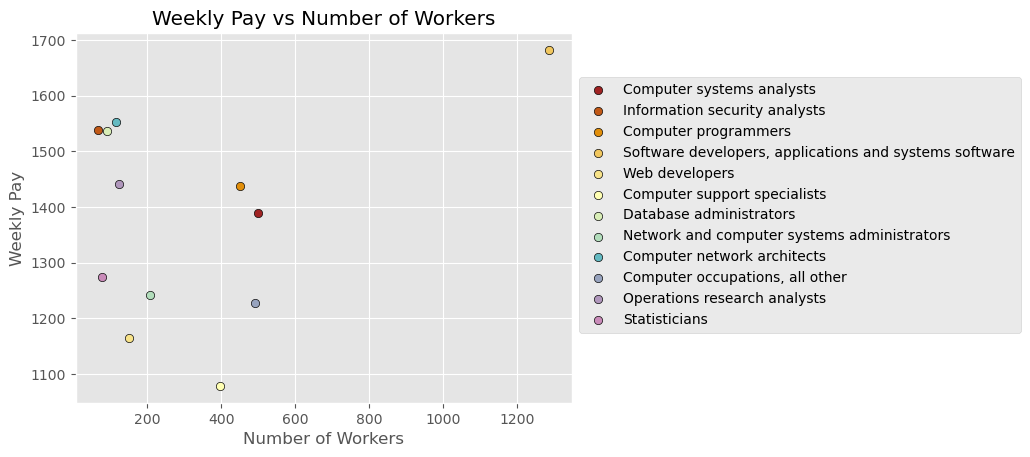

In [11]:
plt.style.use("ggplot")
computational['PAYWEEKLY_ALL'] = pd.to_numeric(computational['PAYWEEKLY_ALL'])
#converting the series to lists (citation 3)
comppay = computational["PAYWEEKLY_ALL"].tolist()
compwork = computational["WORKERS_ALL"].tolist()
compjob = computational["OCCUPATION"].tolist()

#defining the colors for each occupation
palette1 = ['#A02323', '#C15917', '#E28F0A', '#F1C75F', '#F8E389', '#FFFFB3', '#D9EEB7', '#B2DDBB', '#64BAC2', '#97A3BE', '#B097BC', '#C98BB9']

#grouping the occupation together to have separate colors (citation: 4)
for i in range(len(compjob)):
    plt.scatter(compwork[i], comppay[i], color=palette1[i], edgecolor = color, label=compjob[i])

# Adding labels and title
plt.xlabel('Number of Workers')
plt.ylabel('Weekly Pay')
plt.title('Weekly Pay vs Number of Workers')

# Creating the legend
plt.legend(bbox_to_anchor = (1, .9))

# Displaying the plot
plt.show()

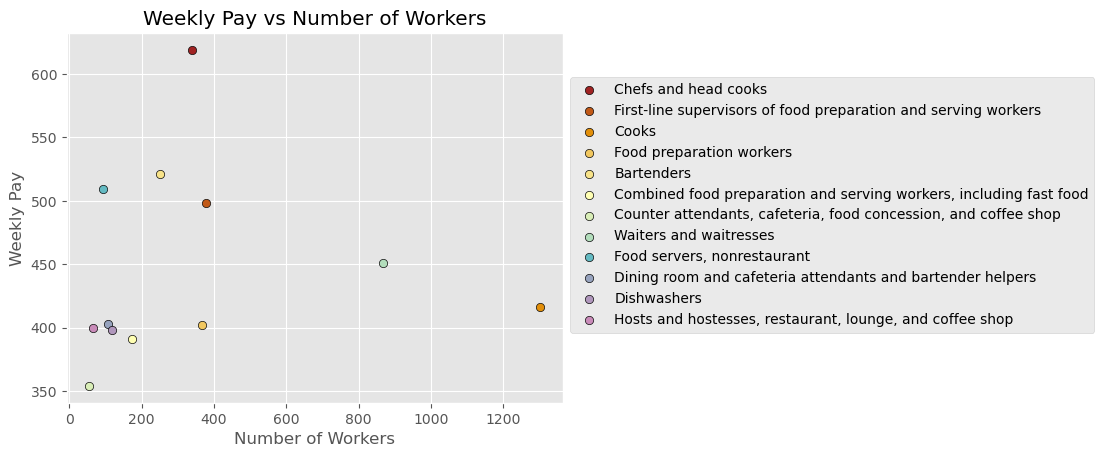

In [12]:
plt.style.use("ggplot")
culinary['PAYWEEKLY_ALL'] = pd.to_numeric(culinary['PAYWEEKLY_ALL'])
culpay = culinary["PAYWEEKLY_ALL"].tolist()
culwork = culinary["WORKERS_ALL"].tolist()
culjob = culinary["OCCUPATION"].tolist()

for i in range(len(compjob)):
    plt.scatter(culwork[i], culpay[i], color=palette1[i], edgecolor = color, label=culjob[i])

plt.xlabel('Number of Workers')
plt.ylabel('Weekly Pay')
plt.title('Weekly Pay vs Number of Workers')
plt.legend(bbox_to_anchor = (1, .9))

plt.show()

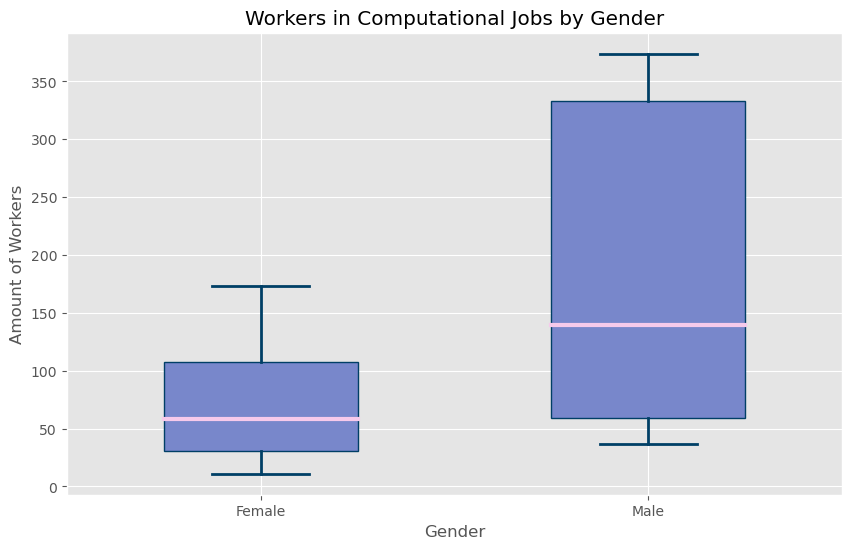

In [13]:
compworkALL = computational[["WORKERS_F", "WORKERS_M"]]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(compworkALL, widths=0.5, patch_artist=True,
           showmeans=False, showfliers=False,
           medianprops={"color": "#F6CAEB", "linewidth": 3},
           boxprops={"facecolor": "#7887CB", "edgecolor": "#003F66", "linewidth": 1},
           whiskerprops={"color": "#003F66", "linewidth": 2},
           capprops={"color": "#003F66", "linewidth": 2})

plt.xlabel('Gender')
plt.ylabel('Amount of Workers')
plt.title('Workers in Computational Jobs by Gender')
plt.xticks([1, 2], ['Female', 'Male'])

plt.show()

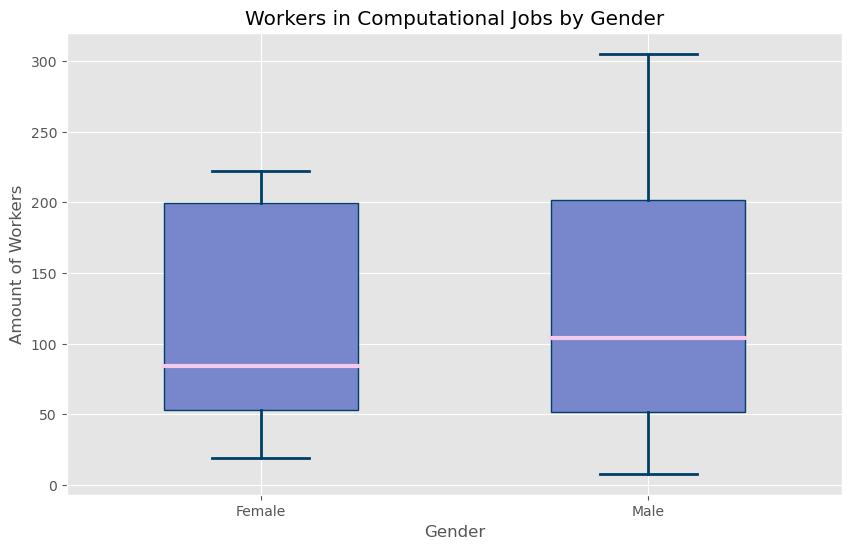

In [14]:
culworkALL = culinary[["WORKERS_F", "WORKERS_M"]]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(culworkALL, widths=0.5, patch_artist=True,
           showmeans=False, showfliers=False,
           medianprops={"color": "#F6CAEB", "linewidth": 3},
           boxprops={"facecolor": "#7887CB", "edgecolor": "#003F66", "linewidth": 1},
           whiskerprops={"color": "#003F66", "linewidth": 2},
           capprops={"color": "#003F66", "linewidth": 2})

plt.xlabel('Gender')
plt.ylabel('Amount of Workers')
plt.title('Workers in Computational Jobs by Gender')
plt.xticks([1, 2], ['Female', 'Male'])

plt.show()

__Conclusions__

For my data project, I had four main questions. The first was which occupation category has the largest gap between male and female workers, along with their pay. Through my first graph, I was able to learn the construction, office, and transportation categories have the largest gaps. Although construction and transportation have more males than females, the office category is swapped, with more females than males. I learned the categories with the smallest gaps were the culinary, legal, and science categories. Through the second graph, I learned the legal occupation category has the largest pay gap, with men earning up to 600 more than their female coworkers. 

Next, I created new graphs to find the highest and lowest weekly pay by occupation category. Through the first graph, I learned computational has the highest, and through the second, I learned culinary has the lowest. This answered my next research question, what occupation categories have the highest and lowest weekly pay? Computation has a weekly pay of 1428, while culinary has a weekly pay of 441.

From this, I narrowed my focus to the computational and culinary categories. I used my third research question, what is the weekly pay compared to the number of workers for each occupation. I created two separate graphs and learned there wasn't a relationship between the weekly pay versus the number of workers. Next, I focused on my last research question, which one of these categories has the largest gender gap? I created two new graphs and compared them to each other. The computational jobs had lower female workers and a higher range of male workers. Meanwhile, the culinary jobs didn't have as large a range. Although the male workers had a higher and lower maximum and minimum, they had a similar interquartile range and mean. 

Through this project, I learned construction, office, and transportation have the largest gender gaps. While culinary, legal, and science have the lowest. Computational has the highest weekly pay, and culinary has the lowest. Inside the culinary and computational category, there is no relationship between the weekly pay versus the number of workers. Compared to each other, culinary jobs have a lower gender gap in the computational category.

__Work Cited__

citation 1: https://stackoverflow.com/questions/50599934/removing-rows-from-dataframe-whose-first-letter-is-in-lowercase

citation 2: https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

citation 3: https://pandas.pydata.org/docs/reference/api/pandas.Series.tolist.html

citation 4: https://stackoverflow.com/questions/56394204/pandas-groupby-scatter-plot-in-a-single-plot

citation 5: https://matplotlib.org/stable/index.html